# Importando bibliotecas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Lendo e tratando os arquivos

## Lendo arquivos.

In [2]:
df_baseClimatica = pd.read_csv('base_climatica.csv', sep=',')
df_baseSocioEconomica = pd.read_csv('base_socioeconomica.csv', sep=',')

## Removendo linhas duplicadas.

In [3]:
df_cliSemDuplicadas = df_baseClimatica.drop_duplicates()
df_socSemDuplicadas = df_baseSocioEconomica.drop_duplicates()

## Mudando os tipos das colunas.

In [4]:
df_cliSemDuplicadas['data'] = pd.to_datetime(df_cliSemDuplicadas['data'])
df_cliSemDuplicadas['chuvas_previstas_mm'] = df_cliSemDuplicadas['chuvas_previstas_mm'].astype(float)
df_cliSemDuplicadas['chuvas_reais_mm'] = df_cliSemDuplicadas['chuvas_reais_mm'].astype(float)
df_cliSemDuplicadas['temperatura_media_C'] = df_cliSemDuplicadas['temperatura_media_C'].astype(float)
df_cliSemDuplicadas['variacao_climatica'] = df_cliSemDuplicadas['variacao_climatica'].astype('string')
df_cliSemDuplicadas['indice_umidade_solo'] = df_cliSemDuplicadas['indice_umidade_solo'].astype(float)

df_socSemDuplicadas['data'] = pd.to_datetime(df_socSemDuplicadas['data'])
df_socSemDuplicadas['volume_producao_tons'] = df_socSemDuplicadas['volume_producao_tons'].astype(float)
df_socSemDuplicadas['incidencia_doencas'] = df_socSemDuplicadas['incidencia_doencas'].astype(float)
df_socSemDuplicadas['acesso_agua_potavel'] = df_socSemDuplicadas['acesso_agua_potavel'].astype('string')
df_socSemDuplicadas['indicador_seguranca_alimentar'] = df_socSemDuplicadas['indicador_seguranca_alimentar'].astype(float)

C:\Users\Jhoann\AppData\Local\Temp\ipykernel_2724\933672401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cliSemDuplicadas['data'] = pd.to_datetime(df_cliSemDuplicadas['data'])
C:\Users\Jhoann\AppData\Local\Temp\ipykernel_2724\933672401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cliSemDuplicadas['chuvas_previstas_mm'] = df_cliSemDuplicadas['chuvas_previstas_mm'].astype(float)
C:\Users\Jhoann\AppData\Local\Temp\ipykernel_2724\933672401.py:3: SettingWithCopyWarning: 
A value is trying to 

## Trocando valores nulos no dataframe "base_climatica" das colunas "chuvas_previstas_mm", "chuvas_reais_mm", "temperatura_media_C" e "incide_umidade_solo" pela mediana das colunas, e tratando outliers baseado na realidade do contexto amazônico.

In [22]:
df_cliSemDuplicadas.loc[(df_cliSemDuplicadas['chuvas_previstas_mm'] < 0) | (df_cliSemDuplicadas['chuvas_previstas_mm'] > 200), 'chuvas_previstas_mm'] = np.nan
df_cliSemDuplicadas.loc[(df_cliSemDuplicadas['chuvas_reais_mm'] < 0) | (df_cliSemDuplicadas['chuvas_reais_mm'] > 200), 'chuvas_reais_mm'] = np.nan
df_cliSemDuplicadas.loc[(df_cliSemDuplicadas['temperatura_media_C'] < 20) | (df_cliSemDuplicadas['temperatura_media_C'] > 35), 'temperatura_media_C'] = np.nan
df_cliSemDuplicadas.loc[(df_cliSemDuplicadas['indice_umidade_solo'] < 10) | (df_cliSemDuplicadas['indice_umidade_solo'] > 90), 'indice_umidade_solo'] = np.nan

medianaChuvasPrevistas = df_cliSemDuplicadas['chuvas_previstas_mm'].median()
medianaChuvasReais = df_cliSemDuplicadas['chuvas_reais_mm'].median()
medianaTemperaturaMedia = df_cliSemDuplicadas['temperatura_media_C'].median()
medianaIndiceUmidadeSolo = df_cliSemDuplicadas['indice_umidade_solo'].median()

df_cliSemDuplicadas['chuvas_previstas_mm'].fillna(medianaChuvasPrevistas, inplace=True)
df_cliSemDuplicadas['chuvas_reais_mm'].fillna(medianaChuvasReais, inplace=True)
df_cliSemDuplicadas['temperatura_media_C'].fillna(medianaTemperaturaMedia, inplace=True)
df_cliSemDuplicadas['indice_umidade_solo'].fillna(medianaIndiceUmidadeSolo, inplace=True)

C:\Users\Jhoann\AppData\Local\Temp\ipykernel_2724\620075972.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cliSemDuplicadas['chuvas_previstas_mm'].fillna(medianaChuvasPrevistas, inplace=True)
C:\Users\Jhoann\AppData\Local\Temp\ipykernel_2724\620075972.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cliSemDuplicadas['chuvas_pre

## Trocando valores nulos no dataframe "base_socioeconomica" das colunas "volume_producao_tons", "incidencia_doencas" e "indicador_seguranca_alimentar" pela mediana das colunas, e tratando outliers baseado na realidade do contexto amazônico.

In [6]:
df_socSemDuplicadas.loc[(df_socSemDuplicadas['volume_producao_tons'] < 0.5) | (df_socSemDuplicadas['volume_producao_tons'] > 20), 'volume_producao_tons'] = np.nan
df_socSemDuplicadas.loc[(df_socSemDuplicadas['incidencia_doencas'] < 0) | (df_socSemDuplicadas['incidencia_doencas'] > 10) | (df_socSemDuplicadas['incidencia_doencas'] != df_socSemDuplicadas['incidencia_doencas'].round()), 'incidencia_doencas'] = np.nan
df_socSemDuplicadas.loc[(df_socSemDuplicadas['indicador_seguranca_alimentar'] < 0) | (df_socSemDuplicadas['indicador_seguranca_alimentar'] > 100), 'indicador_seguranca_alimentar'] = np.nan

medianaVolumeProducaoTons = df_socSemDuplicadas['volume_producao_tons'].median()
medianaIncidenciaDoencas = df_socSemDuplicadas['incidencia_doencas'].median()
medianaIndicadoSegurancaAlimentar = df_socSemDuplicadas['indicador_seguranca_alimentar'].median()

df_socSemDuplicadas['volume_producao_tons'].fillna(medianaVolumeProducaoTons, inplace=True)
df_socSemDuplicadas['incidencia_doencas'].fillna(medianaIncidenciaDoencas, inplace=True)
df_socSemDuplicadas['indicador_seguranca_alimentar'].fillna(medianaIndicadoSegurancaAlimentar, inplace=True)


C:\Users\Jhoann\AppData\Local\Temp\ipykernel_2724\4252385215.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_socSemDuplicadas['volume_producao_tons'].fillna(medianaVolumeProducaoTons, inplace=True)
C:\Users\Jhoann\AppData\Local\Temp\ipykernel_2724\4252385215.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_socSemDuplicadas['volume

## Padronizando as linhas da coluna "acesso_agua_potável" e "variacao_climatica" para "sim" e "não".

In [23]:
df_cliSemDuplicadas['variacao_climatica'] = df_cliSemDuplicadas['variacao_climatica'].str.lower()
df_cliSemDuplicadas['variacao_climatica'] = df_cliSemDuplicadas['variacao_climatica'].replace('nao', 'não')

df_socSemDuplicadas['acesso_agua_potavel'] = df_socSemDuplicadas['acesso_agua_potavel'].str.lower()
df_socSemDuplicadas['acesso_agua_potavel'] = df_socSemDuplicadas['acesso_agua_potavel'].replace('nao', 'não')


C:\Users\Jhoann\AppData\Local\Temp\ipykernel_2724\2417470693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cliSemDuplicadas['variacao_climatica'] = df_cliSemDuplicadas['variacao_climatica'].str.lower()
C:\Users\Jhoann\AppData\Local\Temp\ipykernel_2724\2417470693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cliSemDuplicadas['variacao_climatica'] = df_cliSemDuplicadas['variacao_climatica'].replace('nao', 'não')
C:\Users\Jhoann\AppData\Local\Temp\ipykernel_2724\2417470693.py:4: SettingWithCo

## Salvando os dataframes tratados em arquivos CSV.

In [18]:
df_cliSemDuplicadas.to_csv('base_climatica_tratada.csv', index=False)
df_socSemDuplicadas.to_csv('base_socioeconomica_tratada.csv', index=False)

## Juntando os dataframes através da coluna "data".

In [ ]:
df_juncaoDataframes = pd.merge(df_cliSemDuplicadas, df_socSemDuplicadas, on='data', how='inner')
df_juncaoDataframes.sort_values(by='data')
df_juncaoDataframes.to_csv('juntos.csv', index=False)

## Criando um gráfico de linhas para comparar as chuvas reais e as chuvas previstas.

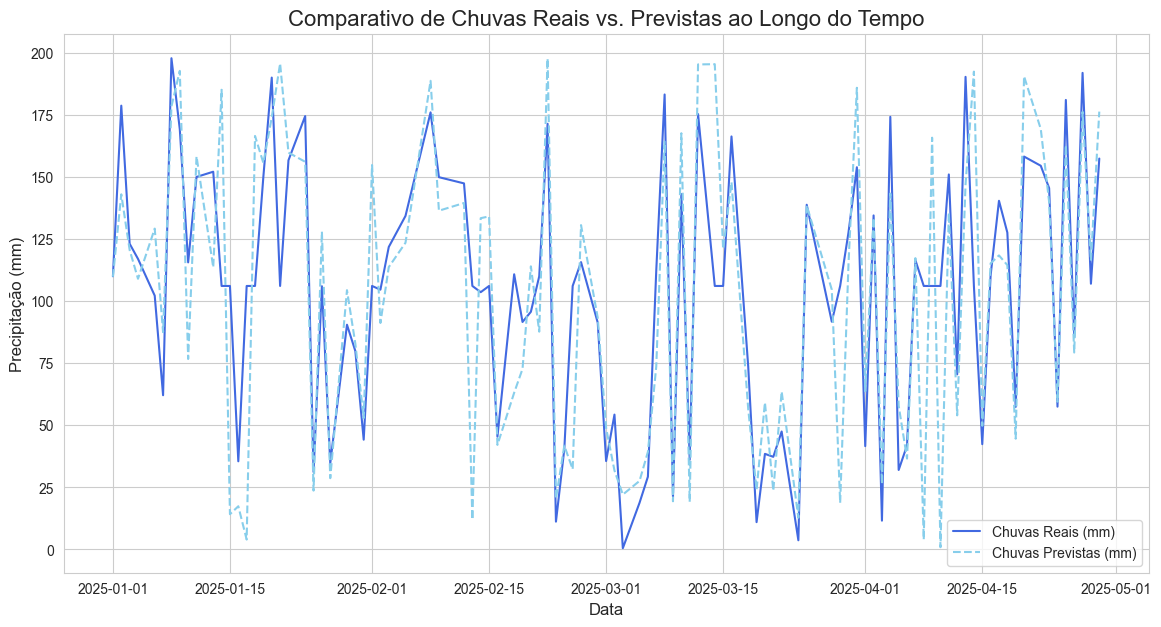

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='data', y='chuvas_reais_mm', data=df_juncaoDataframes, label='Chuvas Reais (mm)', color='royalblue')
sns.lineplot(x='data', y='chuvas_previstas_mm', data=df_juncaoDataframes, label='Chuvas Previstas (mm)', color='skyblue', linestyle='--')

plt.title('Comparativo de Chuvas Reais vs. Previstas ao Longo do Tempo', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Precipitação (mm)', fontsize=12)
plt.legend()
plt.show()

## Criando um heatmap de correlação entre variáveis climáticas e socioeconômicas.

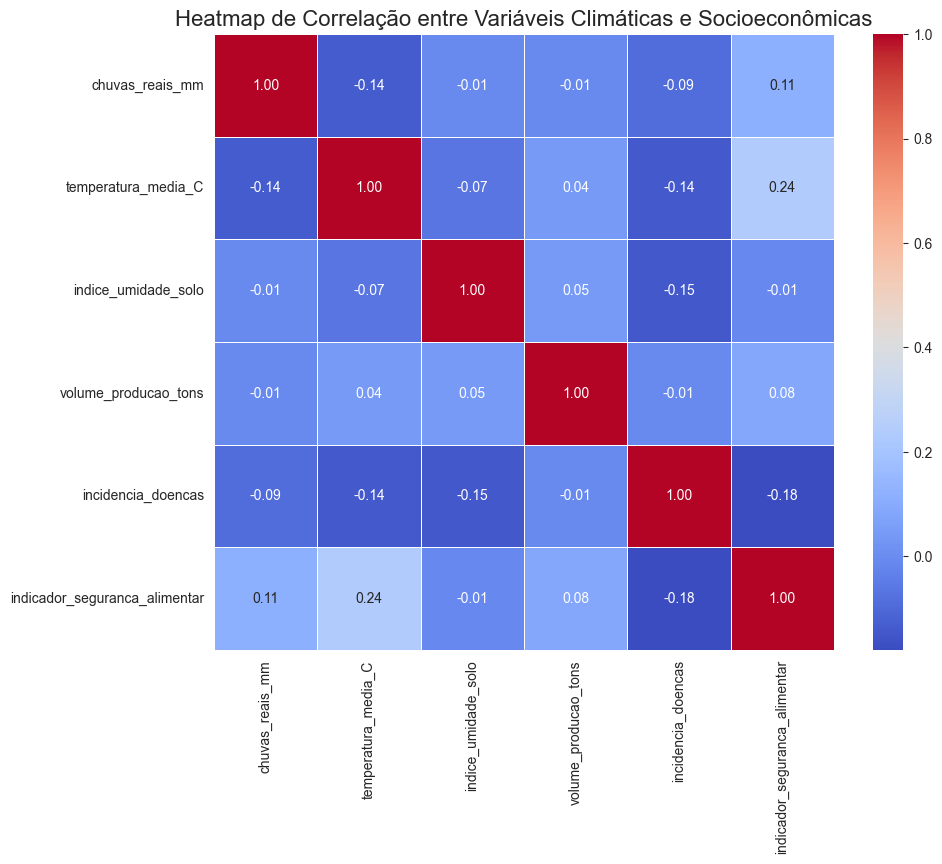

In [ ]:
numeric_cols = [
    'chuvas_reais_mm', 'temperatura_media_C', 'indice_umidade_solo',
    'volume_producao_tons', 'incidencia_doencas', 'indicador_seguranca_alimentar'
]
correlation_matrix = df_juncaoDataframes[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap de Correlação entre Variáveis Climáticas e Socioeconômicas', fontsize=16)
plt.show()

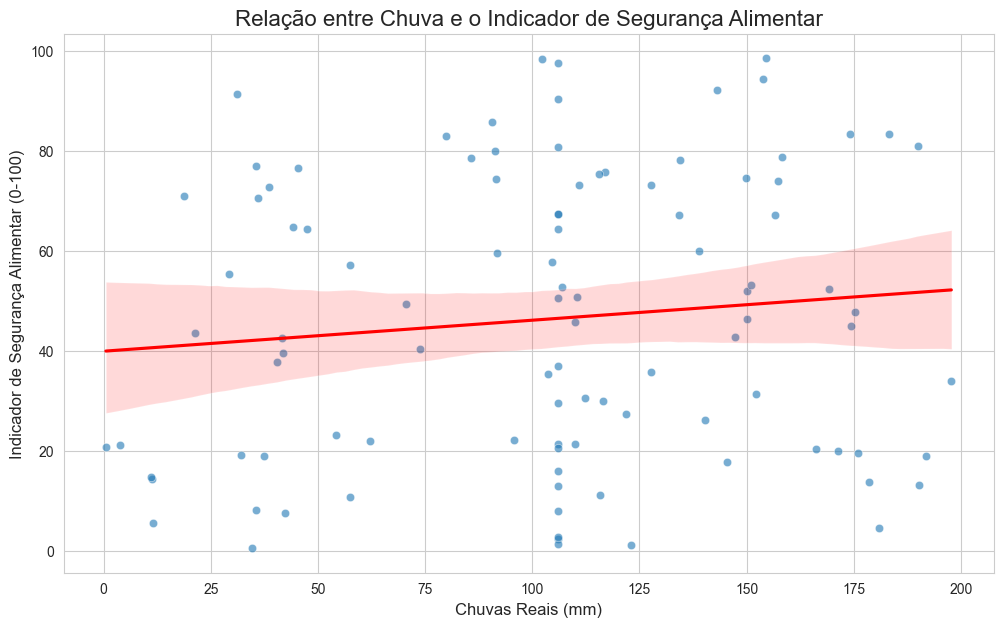

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_juncaoDataframes, x='chuvas_reais_mm', y='indicador_seguranca_alimentar', alpha=0.6)

sns.regplot(data=df_juncaoDataframes, x='chuvas_reais_mm', y='indicador_seguranca_alimentar', scatter=False, color='red')

plt.title('Relação entre Chuva e o Indicador de Segurança Alimentar', fontsize=16)
plt.xlabel('Chuvas Reais (mm)', fontsize=12)
plt.ylabel('Indicador de Segurança Alimentar (0-100)', fontsize=12)
plt.show()

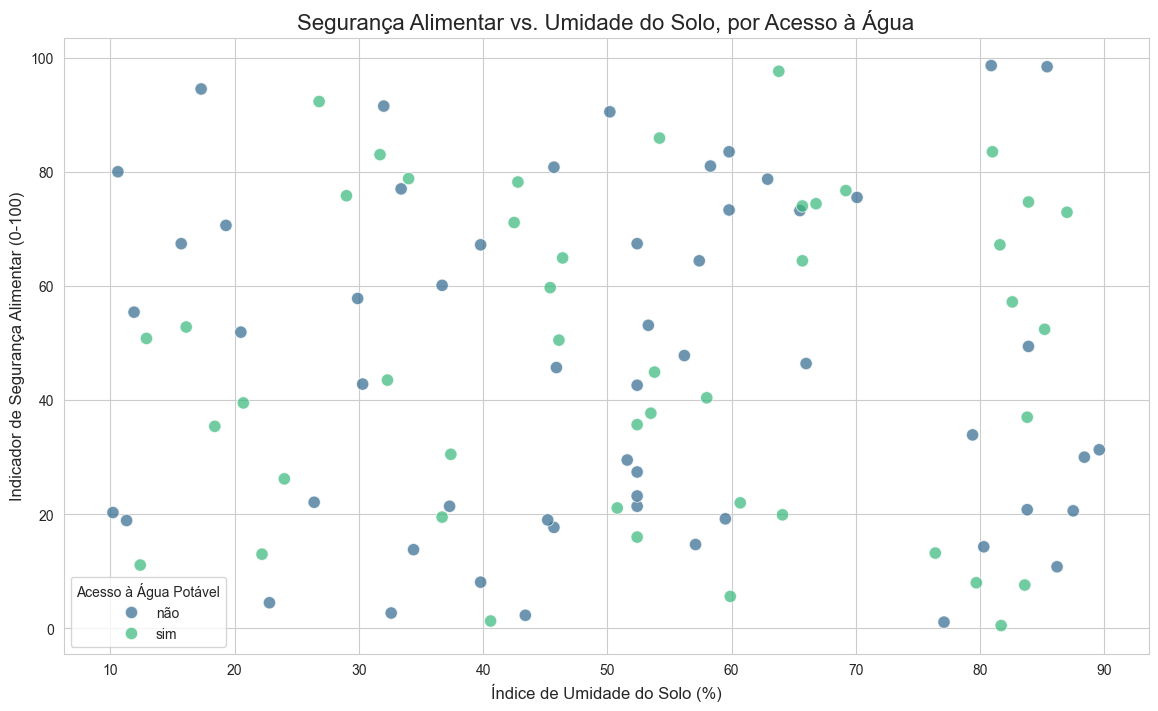

In [ ]:
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=df_juncaoDataframes,
    x='indice_umidade_solo',
    y='indicador_seguranca_alimentar',
    hue='acesso_agua_potavel',  
    palette='viridis',          
    alpha=0.7,
    s=80                        
)

plt.title('Segurança Alimentar vs. Umidade do Solo, por Acesso à Água', fontsize=16)
plt.xlabel('Índice de Umidade do Solo (%)', fontsize=12)
plt.ylabel('Indicador de Segurança Alimentar (0-100)', fontsize=12)
plt.legend(title='Acesso à Água Potável')
plt.show()